In [232]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import MeanShift
from sklearn.metrics import pairwise_distances

In [233]:
pd.set_option("display.max_rows", 250000)

In [250]:
df = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/Sams_github/Capstones/Capstone3/Mouse_blood_data.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tag number                 5752 non-null   object 
 1   Running bleed              5752 non-null   object 
 2   Latest Bleed               4333 non-null   object 
 3   Earliest bleed             4333 non-null   object 
 4   Bleed point in range       5752 non-null   object 
 5   weeks age at bleed         7564 non-null   float64
 6   Gender                     4754 non-null   object 
 7   bleed number               5752 non-null   float64
 8   latest bleed number        5752 non-null   float64
 9   Lookup number              336 non-null    float64
 10  Countif included           337 non-null    float64
 11  Parameter bleed list       4237 non-null   object 
 12  Grouped genotype           8431 non-null   object 
 13  Date of Bleed              8799 non-null   objec

In [335]:
df1 = df.iloc[:, 13:31]
df1['Grouped genotype'] = df['Grouped genotype']
df1.index= df1['Grouped genotype'].tolist()
df1.dropna()

,Date of Bleed,Tag trimmed,Combined name & treatment,Date of Birth,WBC (K/ul),NE (K/ul),LY (K/ul),MO (K/ul),0,RBC (M/ul),Hb (g/dL),HCT (%),MCV (fL),MCH (pg),MCHC (g/dL),RDW (%),PLT (K/ul),MPV (fL),Grouped genotype
WT (mixed) -4-8,5/19/17,22599,Brca1f/f; Cbpf/+,4/21/17,8.86,1.15,7.23,0.46,0.020,8.93,12.5,51,57.1,14,24.5,29.7,668,4.7,WT (mixed) -4-8
WT (mixed) -4-8,5/19/17,22600,Brca1f/+; Cbpf/+,4/21/17,7.42,1.26,5.78,0.36,0.020,8.81,12.3,45.6,51.8,14,27,26.8,650,4.5,WT (mixed) -4-8
Vav-cre; Brca1f/+; Cbpf/+ -4-8,5/19/17,22601,Vav-cre; Brca1f/+; Cbpf/+,4/21/17,8.02,1.39,6.23,0.39,0.020,9.51,13.7,51.4,54.1,14.4,26.7,27.2,526,4.7,Vav-cre; Brca1f/+; Cbpf/+ -4-8
WT (mixed) -4-8,5/19/17,22602,Brca1f/f; Cbpf/+,4/21/17,5.34,0.78,4.26,0.28,0.010,9.68,13.7,48.3,49.9,14.2,28.4,23.2,618,4.6,WT (mixed) -4-8
WT (mixed) -4-8,5/19/17,22603,Brca1f/+; Cbpf/+,4/21/17,7.64,1.5,5.7,0.4,0.030,9.77,13.9,49.6,50.8,14.2,28,24,617,5.1,WT (mixed) -4-8
Vav-cre; Brca1f/f; Cbpf/+ -4-8,5/19/17,22604,Vav-cre; Brca1f/f; Cbpf/+,4/21/17,1.68,0.64,0.5,0.12,0.340,2.91,10,23.9,82,34.4,41.8,39.4,289,6.3,Vav-cre; Brca1f/f; Cbpf/+ -4-8
Vav-cre; Brca1f/f; Cbpf/+ -4-8,5/19/17,22605,Vav-cre; Brca1f/f; Cbpf/+,4/21/17,0.48,0.13,0.32,0.02,0.010,5.75,10,37.1,64.5,17.4,27,28.9,385,6.4,Vav-cre; Brca1f/f; Cbpf/+ -4-8
Vav-cre; Brca1f/+; Cbpf/f -4-8,5/19/17,22606,Vav-cre; Brca1f/+; Cbpf/f,4/21/17,5.26,2.56,1.87,0.73,0.070,7.64,11.8,42.7,55.9,15.4,27.6,30.3,457,5.7,Vav-cre; Brca1f/+; Cbpf/f -4-8
Cbpf/+ (exclude) -4-8,5/19/17,22607,Cbpf/+ (exclude),4/20/17,6.38,1.09,4.86,0.42,0.010,8.89,13.9,52.8,59.4,15.6,26.3,22.9,723,4.7,Cbpf/+ (exclude) -4-8
Vav-cre; Cbpf/+ (exclude) -4-8,5/19/17,22608,Vav-cre; Cbpf/+ (exclude),4/20/17,6.58,1.47,4.68,0.42,0.010,8.2,13.1,47.2,57.6,16,27.8,23.5,766,4.7,Vav-cre; Cbpf/+ (exclude) -4-8


In [336]:
X = df1.loc[:,'WBC (K/ul)': 'MPV (fL)'].drop('0', axis = 1).dropna()
Xnum = X.apply(pd.to_numeric, errors = 'coerce').dropna()

Xnum.index

Index([                                       nan,
              'vav-cre; brca1f/+ (pure) >12 - 24',
              'vav-cre; brca1f/+ (pure) >12 - 24',
                      'TX0-0 WT pre-0 days BTXUT',
                      'TX0-0 WT pre-0 days BTXUT',
                      'TX0-0 WT pre-0 days BTXUT',
                      'TX0-0 WT pre-0 days BTXUT',
                      'TX0-0 WT pre-0 days BTXUT',
       'TX0-0 Vav-cre; Brca1f/+ pre-0 days BTXUT',
       'TX0-0 Vav-cre; Brca1f/+ pre-0 days BTXUT',
       ...
                                              nan,
                                              nan,
                                              nan,
                                              nan,
                                              nan,
                                              nan,
                                              nan,
                                              nan,
                                              nan,
                    

In [337]:
scaler = StandardScaler()
X_std = scaler.fit_transform(Xnum)

# PCA fitting

In [338]:
pca = PCA(n_components = 10)
pcafitdf2 = pca.fit_transform(X_std)


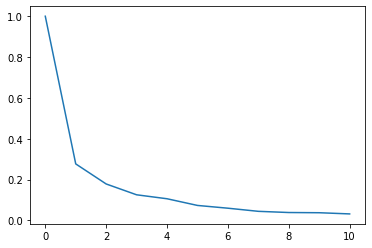

In [339]:
variance = np.insert(pca.explained_variance_ratio_, 0, 1)
x = [i for i in range(variance.shape[0])]

plt.plot(x, variance)

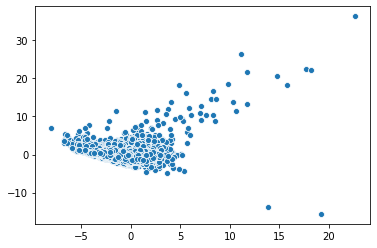

In [340]:
import seaborn as sns
sns.scatterplot(pcafitdf2[:,0], pcafitdf2[:,1])

# UMAP fitting

In [366]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=1,
                      metric='correlation').fit_transform(X_std)

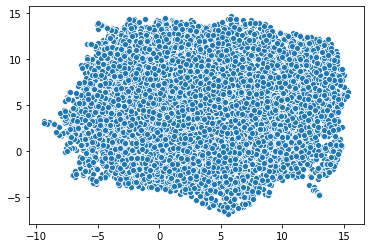

In [367]:
sns.scatterplot(umap_results[:,0], umap_results[:,1])
plt.show()

# DBSCAN fitting

In [292]:
dbscan_clusters5 = DBSCAN(eps=129.6, min_samples=1,  metric = 'euclidean', algorithm = 'ball_tree')

# Fit model
clusters5 = dbscan_clusters5.fit_predict(X_std)
clusters5_trans = clusters5
np.unique(clusters5).shape

(1,)

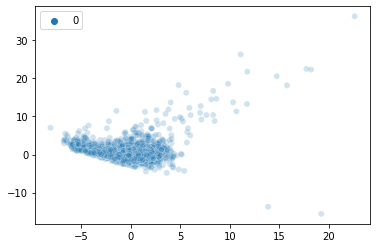

In [294]:
sns.scatterplot(pcafitdf2[:,0], pcafitdf2[:,1], alpha = .2, hue = clusters5_trans)

# Gaussian fitting

In [296]:
gmm = GaussianMixture(n_components = 6)
gmm.fit(X_std)
gmmcluster = gmm.fit_predict(X_std)

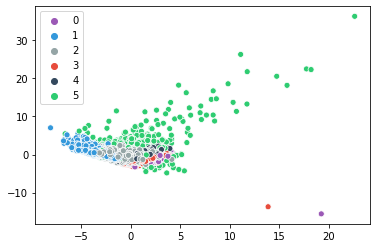

In [297]:
sns.scatterplot(pcafitdf2[:,0], pcafitdf2[:,1], alpha= 1, hue = gmmcluster, palette = {0:"#9b59b6", 1:"#3498db", 2:"#95a5a6", 3:"#e74c3c", 4:"#34495e", 5:"#2ecc71"})

# Kernel PCA fitting

In [298]:
kpcarbf = KernelPCA(n_components=2, kernel = 'rbf', gamma =100)
kcompsrbf = kpcarbf.fit_transform(X_std)

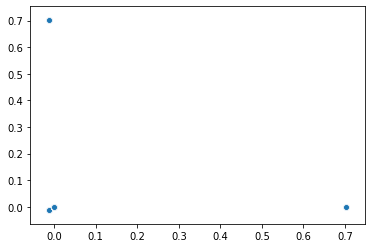

In [299]:
sns.scatterplot(kcompsrbf[:,0], kcompsrbf[:,1], alpha= 1)

# K Means fitting

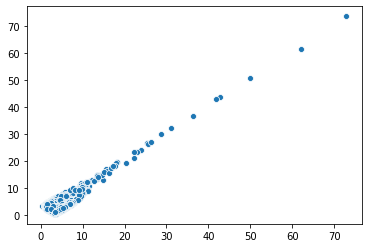

In [307]:
km = KMeans(n_clusters = 2, random_state=42)
kmdata = km.fit_transform(X_std)
sns.scatterplot(kmdata[:,0], kmdata[:, 1])

# Hierarchical fitting

In [301]:
agg = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',linkage = 'ward')
agg.fit(X_std)
aggdata = agg.fit_predict(X_std)

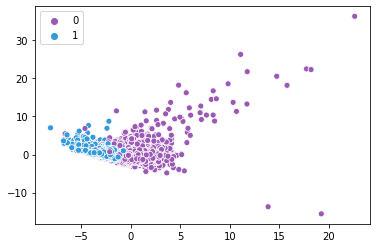

In [302]:
sns.scatterplot(pcafitdf2[:,0], pcafitdf2[:,1], hue = aggdata, palette = {0:"#9b59b6", 1:"#3498db", 2:"#95a5a6", 3:"#e74c3c", 4:"#34495e", 5:"#2ecc71"})

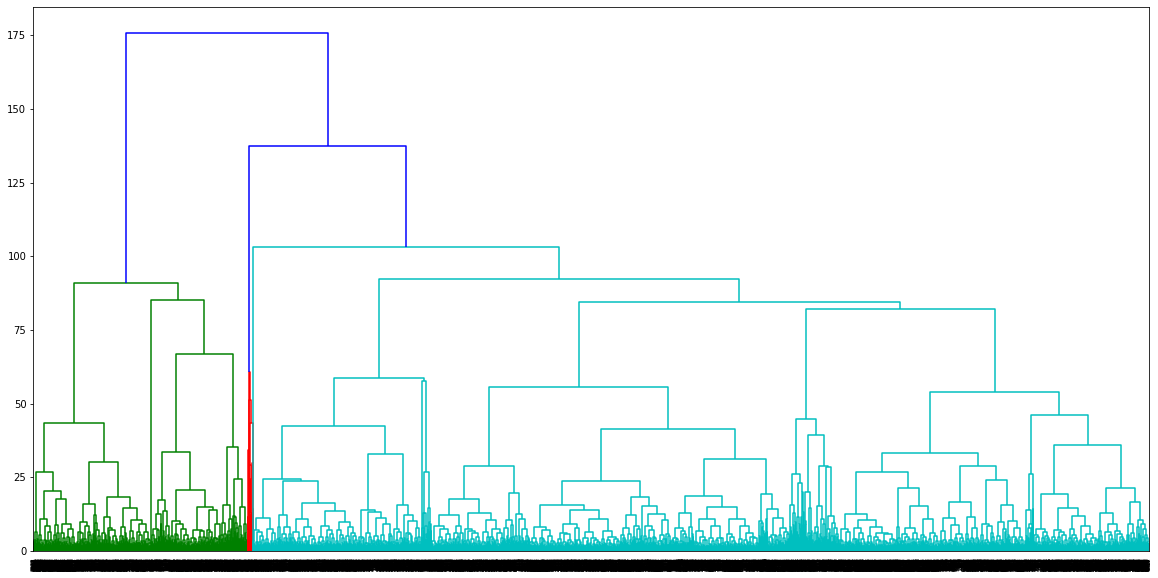

In [303]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method = 'ward'))
plt.show()

# Mean shift fitting

In [306]:
ms = MeanShift(bandwidth=1)
ms.fit(X_std)
msclusters = ms.fit_predict(X_std)
pd.Series(msclusters).value_counts()

0       596
1       393
2       160
3       135
5       123
4       104
13       90
6        84
9        77
7        60
39       60
8        55
37       51
12       50
36       47
10       44
35       42
11       42
14       39
52       38
54       36
15       35
74       35
17       34
19       34
25       33
53       32
26       32
34       30
101      30
103      29
55       29
21       28
48       28
1020     28
16       28
69       28
944      27
43       26
71       26
86       26
132      26
24       26
31       25
23       24
79       23
265      23
29       22
22       22
30       22
20       22
18       21
197      21
28       21
834      21
49       21
64       20
44       20
192      20
40       20
65       20
156      19
51       19
33       19
128      19
195      19
191      19
870      18
42       18
122      18
84       18
32       18
41       18
324      17
160      17
80       17
57       17
87       16
954      16
61       16
67       16
46       15
165      15
136 

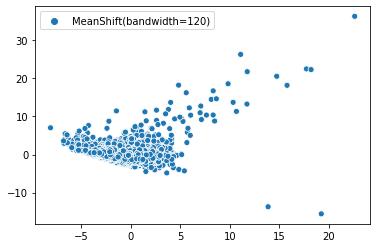

In [305]:
sns.scatterplot(pcafitdf2[:,0], pcafitdf2[:,1], hue = ms)